# Algoritmos de Clasificación

## Regresión Logística:

La regresión logística es un algoritmo de clasificación binaria que se utiliza para predecir la probabilidad de que una instancia pertenezca a una clase determinada. Para ilustrar su funcionamiento, utilizaremos el conjunto de datos Iris, que es un conjunto de datos de clasificación multiclase.

### Paso 1: Importar las bibliotecas necesarias y cargar el conjunto de datos Iris.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()

In [ ]:
# Creamos un dataframe de pandas con los datos de iris
dfiris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Renombramos los valores de la columna "target" por los nombres de las especies
#dfiris['target'] = dfiris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
dfiris.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Dividimos el dataset en los conjuntos X e y, donde y siempre será nuestra variable a predecir y X será el conjunto de todos los datos que queremos tomar en cuenta para la predicción.

In [ ]:
X = dfiris.drop('target', axis=1)
y = dfiris['target']

### Paso 2: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba. (Split)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train)
print(y_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                 5.5               2.4                3.7               1.0
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
75                 6.6               3.0                4.4               1.4
109                7.2               3.6                6.1               2.5
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[105 rows x 4 columns]
81     1.0
133    2.0
137    2.0
75     

Este código divide el conjunto de datos X e y en conjuntos de entrenamiento y prueba.

El 80% de los datos se utilizarán para entrenar el modelo (almacenados en X_train y y_train), mientras que el 20% restante se utilizará para evaluar el rendimiento del modelo (almacenados en X_test y y_test).

El random state nos ayuda a garantizar que el modelo podrá ser reproducible.

### Paso 3: Crear y ajustar el modelo de regresión logística. (Train)

In [ ]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

Durante el proceso de ajuste, el modelo de regresión logística aprenderá los coeficientes y los términos de intercepción óptimos para realizar la predicción de las etiquetas basándose en las características de entrada.

Una vez que el modelo ha sido ajustado utilizando el conjunto de entrenamiento, está listo para hacer predicciones utilizando nuevas muestras de datos.

### Paso 4: Realizar predicciones en el conjunto de prueba y evaluar la precisión. (Test)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0.]


In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión de la regresión logística:", accuracy)

Precisión de la regresión logística: 1.0


In [ ]:
# Calcular la matriz de confusión para la regresión logística
confusion_lr = confusion_matrix(y_test, y_pred)

print(confusion_lr)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


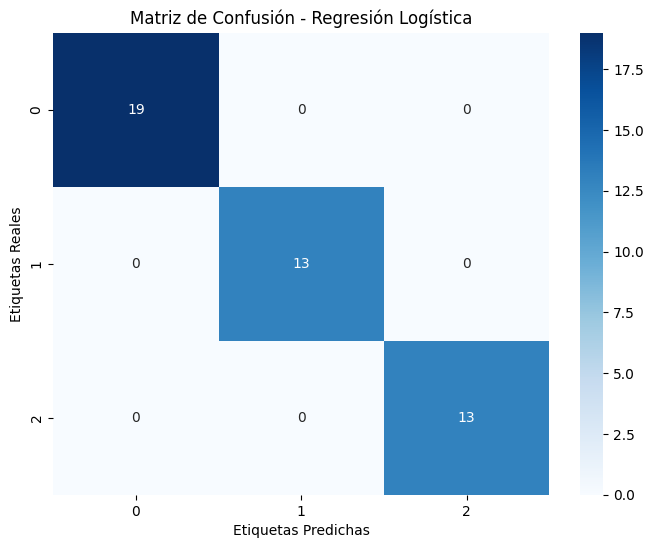

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.show()

## Árboles de Decisión:
Los árboles de decisión son algoritmos de clasificación que utilizan estructuras de árbol para tomar decisiones basadas en características específicas de los datos. Para este ejemplo, utilizaremos el conjunto de datos Breast Cancer, que es un conjunto de datos de clasificación binaria.

### Paso 1: Importar las bibliotecas necesarias y cargar el conjunto de datos Breast Cancer.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Cargar el conjunto de datos Breast Cancer
cancer = load_breast_cancer()

In [ ]:
# Crear un dataframe de pandas
dfcancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Agregar la columna de la variable objetivo al dataframe
dfcancer['target'] = cancer.target

In [ ]:
dfcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dividimos el dataset en los conjuntos X e y, donde y siempre será nuestra variable a predecir y X será el conjunto de todos los datos que queremos tomar en cuenta para la predicción.

In [ ]:
X = dfcancer.drop('target', axis=1)
y = dfcancer['target']

### Paso 2: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Este código divide el conjunto de datos X e y en conjuntos de entrenamiento y prueba.

El 80% de los datos se utilizarán para entrenar el modelo (almacenados en X_train y y_train), mientras que el 20% restante se utilizará para evaluar el rendimiento del modelo (almacenados en X_test y y_test).

El random state nos ayuda a garantizar que el modelo podrá ser reproducible.

### Paso 3: Crear y ajustar el modelo de árbol de decisión.

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Ajustar el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier()

Durante el proceso de ajuste, el modelo de  árbol de decisión aprenderá los coeficientes y los términos de intercepción óptimos para realizar la predicción de las etiquetas basándose en las características de entrada.

Una vez que el modelo ha sido ajustado utilizando el conjunto de entrenamiento, está listo para hacer predicciones utilizando nuevas muestras de datos.

### Paso 4: Realizar predicciones en el conjunto de prueba y evaluar la precisión.

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


In [ ]:
ruta_archivo = 'ruta/del/archivo/nombre_archivo.xlsx'
X_test.to_excel(ruta_archivo, index=False)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión de los árboles de decisión:", accuracy)

Precisión de los árboles de decisión: 0.9298245614035088


In [ ]:
# Calcular la matriz de confusión para los árboles de decisión
confusion_dt = confusion_matrix(y_test, y_pred)

print(confusion_dt)

[[39  4]
 [ 4 67]]


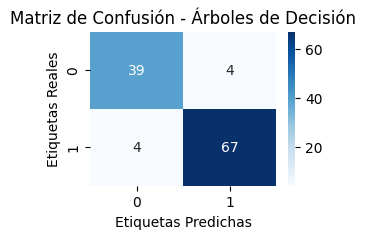

In [ ]:
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Árboles de Decisión")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.show()

In [ ]:
X_test['prediccion'] = y_pred

In [ ]:
X_test['target'] = y_test

In [ ]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prediccion,target
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1,1


#Otros algoritmos de Clasificación

In [ ]:
#Máquinas de Soporte Vectorial (SVM):
from sklearn.svm import SVC

#Random Forest para Clasificación:
from sklearn.ensemble import RandomForestClassifier

#K-vecinos más cercanos para Clasificación:
from sklearn.neighbors import KNeighborsClassifier

#Naive Bayes:
from sklearn.naive_bayes import GaussianNB

#Redes Neuronales para Clasificación (usando Scikit-learn):
from sklearn.neural_network import MLPClassifier

# Algoritmos de Regresión

## Regresión Lineal:
La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza para modelar la relación entre una variable dependiente (objetivo) y una o más variables independientes (características). El objetivo es encontrar una línea recta que mejor se ajuste a los datos para predecir los valores de la variable dependiente.

### Paso 1: Importar las bibliotecas necesarias y cargar el conjunto de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar el conjunto de datos fetch california housing
data = fetch_california_housing(as_frame=True)
dfcalifornia = data.frame

In [ ]:
dfcalifornia.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dividimos el dataset en los conjuntos X e y, donde y siempre será nuestra variable a predecir y X será el conjunto de todos los datos que queremos tomar en cuenta para la predicción.

In [ ]:
# Obtener los datos y las etiquetas
X = dfcalifornia.drop('MedHouseVal', axis=1)  # Características
y = dfcalifornia['MedHouseVal']  # Etiquetas

### Paso 2: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba. (Split)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 3: Crear y ajustar el modelo de regresión lineal. (Train)

In [ ]:
# Crear una instancia del modelo de regresión lineal ordinaria
reg_ols = LinearRegression()
reg_ridge = Ridge()
reg_lasso = Lasso()

# Ajustar el modelo a los datos de entrenamiento
reg_ols.fit(X_train, y_train)
reg_ridge.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)

Lasso()

### Paso 4: Realizar predicciones en el conjunto de prueba y evaluar la precisión. (Test)

In [ ]:
# Predecir los valores de salida para los datos de prueba
y_pred = reg_ols.predict(X_test)
y_pred_ridge = reg_ridge.predict(X_test)
y_pred_lasso = reg_lasso.predict(X_test)

In [ ]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
mser = mean_squared_error(y_test, y_pred_ridge)
msel = mean_squared_error(y_test, y_pred_lasso)
print(mse)
print(mser)
print(msel)

0.5558915986952444
0.5558034669932211
0.9380337514945427


## Otros tipos de regresiones:
Se pueden repetir los pasos 3 y 4 con los modelos Ridge y Lasso

### Regresión de Ridge:
La regresión de Ridge es una variante de la regresión lineal que introduce una penalización de regularización para reducir el riesgo de sobreajuste. La penalización de Ridge agrega un término adicional a la función de coste de la regresión lineal, que penaliza los coeficientes grandes. Esto ayuda a evitar que los coeficientes se vuelvan demasiado sensibles a las fluctuaciones en los datos de entrenamiento. La regresión de Ridge es especialmente útil cuando hay multicolinealidad en los datos, es decir, cuando las variables independientes están altamente correlacionadas entre sí.

### Regresión de Lasso:
La regresión de Lasso es otra variante de la regresión lineal que también introduce una penalización de regularización. Al igual que la regresión de Ridge, la penalización de Lasso ayuda a evitar el sobreajuste, pero tiene una propiedad adicional: tiende a reducir los coeficientes de las variables menos importantes a cero, lo que puede conducir a la selección automática de características. Esto significa que la regresión de Lasso puede ayudar a realizar una selección de características al identificar y descartar automáticamente las variables irrelevantes.

#Otros algoritmos de Regresion

In [ ]:
#Regresión con Soporte Vectorial (SVR):
from sklearn.svm import SVR

#Árboles de Decisión para Regresión:
from sklearn.tree import DecisionTreeRegressor

#Random Forest para Regresión:
from sklearn.ensemble import RandomForestRegressor

#K-vecinos más cercanos para Regresión:
from sklearn.neighbors import KNeighborsRegressor

#Regresión ElasticNet:
from sklearn.linear_model import ElasticNet

#Redes Neuronales para Regresión (usando Scikit-learn):
from sklearn.neural_network import MLPRegressor